In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 


In [4]:
df =pd.read_csv('KnnData.csv')

In [5]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [6]:
df.shape

(569, 32)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [8]:
df.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [9]:
df.dropna(inplace=True)

In [10]:
df.shape

(569, 32)

In [11]:
y=df['diagnosis']
X=df[['texture_mean','radius_mean']]

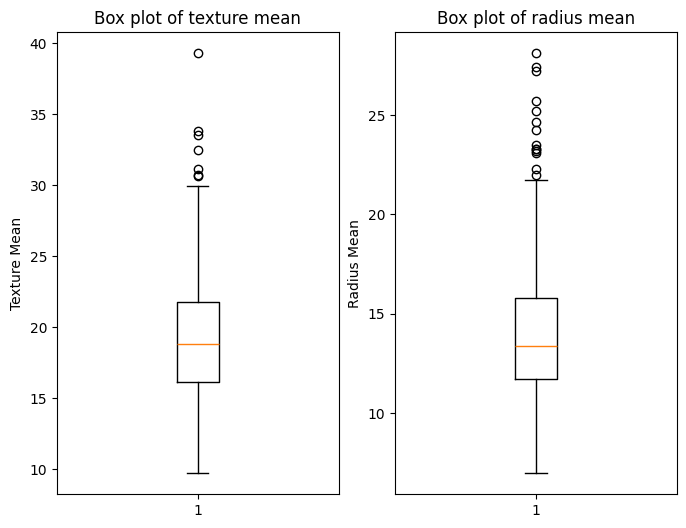

In [12]:
plt.figure(figsize=(8,6))
plt.subplot(1,2,1)
plt.boxplot(df['texture_mean'])
plt.title('Box plot of texture mean')
plt.ylabel('Texture Mean')


plt.subplot(1,2,2)
plt.boxplot(df['radius_mean'])
plt.title('Box plot of radius mean')
plt.ylabel('Radius Mean')

plt.show()

In [13]:
Q1_texture=df['texture_mean'].quantile(0.25)
Q3_texture = df['texture_mean'].quantile(0.75)
IQR_texture = Q3_texture - Q1_texture

Q1_radius = df['radius_mean'].quantile(0.25)
Q3_radius = df['radius_mean'].quantile(0.75)
IQR_radius = Q3_radius - Q1_radius

lower_tex = Q1_texture - 1.5*IQR_texture
upper_tex = Q3_texture +1.5*IQR_texture

lower_rad = Q1_radius - 1.5*IQR_radius
upper_rad = Q3_radius +1.5*IQR_radius

df_cleaned = df[(df['texture_mean']>=lower_tex)&(df['texture_mean']<=upper_tex)&(df['radius_mean']>=lower_rad)&(df['radius_mean']<=upper_rad)]
df_cleaned.shape

(548, 32)

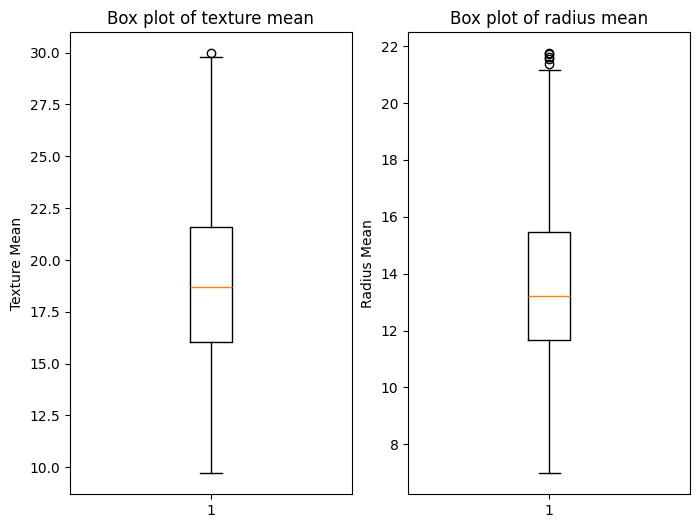

In [14]:
plt.figure(figsize=(8,6))
plt.subplot(1,2,1)
plt.boxplot(df_cleaned['texture_mean'])
plt.title('Box plot of texture mean')
plt.ylabel('Texture Mean')


plt.subplot(1,2,2)
plt.boxplot(df_cleaned['radius_mean'])
plt.title('Box plot of radius mean')
plt.ylabel('Radius Mean')

plt.show()

In [15]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y=label_encoder.fit_transform(y)

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled =scaler.fit_transform(X)

In [17]:
X_scaled

array([[-2.07333501,  1.09706398],
       [-0.35363241,  1.82982061],
       [ 0.45618695,  1.57988811],
       ...,
       [ 2.0455738 ,  0.70228425],
       [ 2.33645719,  1.83834103],
       [ 1.22179204, -1.80840125]], shape=(569, 2))

In [18]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [19]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=42)

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

k_values =list(range(1,30))
accuracies=[]

for k in k_values:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    predictions =knn.predict(X_test)
    accuracy = accuracy_score(y_test,predictions)
    accuracies.append(accuracy)

for k,accuracy in zip(k_values,accuracies):
    print(f'k={k},Accuracy:{accuracy:.4f}')
best_k = k_values[accuracies.index(max(accuracies))]
print(f'Best k:{best_k} with accuracy:{max(accuracies):.4f}')

k=1,Accuracy:0.8947
k=2,Accuracy:0.8947
k=3,Accuracy:0.8947
k=4,Accuracy:0.8860
k=5,Accuracy:0.9035
k=6,Accuracy:0.9035
k=7,Accuracy:0.9035
k=8,Accuracy:0.9211
k=9,Accuracy:0.9211
k=10,Accuracy:0.9298
k=11,Accuracy:0.9035
k=12,Accuracy:0.9298
k=13,Accuracy:0.9211
k=14,Accuracy:0.9298
k=15,Accuracy:0.9211
k=16,Accuracy:0.9211
k=17,Accuracy:0.9211
k=18,Accuracy:0.9211
k=19,Accuracy:0.9123
k=20,Accuracy:0.9211
k=21,Accuracy:0.9035
k=22,Accuracy:0.9123
k=23,Accuracy:0.9035
k=24,Accuracy:0.9123
k=25,Accuracy:0.9035
k=26,Accuracy:0.9035
k=27,Accuracy:0.9123
k=28,Accuracy:0.9123
k=29,Accuracy:0.9123
Best k:10 with accuracy:0.9298


In [27]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score
knn=KNeighborsClassifier(n_neighbors=6);
knn.fit(X_train,y_train)
predictions=knn.predict(X_test)
conf_matrix = confusion_matrix(y_test,predictions)

<Axes: >

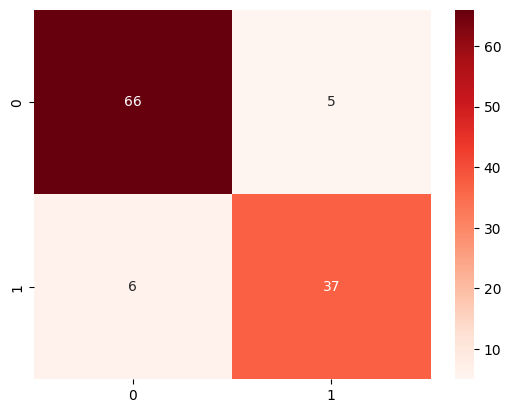

In [28]:
sns.heatmap(conf_matrix, annot=True,fmt='g',cmap="Reds")
